In [5]:
os.chdir('/Users/biswanathpatro/Study/machine learning/Proj Ramin/Facial Expression Analysis/data')

In [6]:
import pandas as pd
import numpy as np
import os
import re

In [9]:
#os.chdir(str(os.getcwd())+'\\data')

In [7]:
files = os.listdir()
files = list(filter(lambda x: x.endswith('.txt'),files))

In [10]:
# Filtering the necessary files
files = files[:-1]
files_set = set()
for i in files:
    if 'datapoints' in i:
        files_set.add(re.search('._(.*)_datapoints.txt',i).group(1))

In [11]:
files_set =  list(files_set)
files_set

['doubt_question',
 'topics',
 'yn_question',
 'wh_question',
 'negative',
 'relative',
 'emphasis',
 'affirmative',
 'conditional']

In [12]:
def load_files(files_set):
    subjects = ['a','b']
    
    for filename in files_set:
        for subject in subjects:
            # Read data from each file
            filename_datapoint = subject+'_'+filename+'_'+'datapoints.txt'
            df = pd.read_csv(filename_datapoint,sep=' ')
            
            #Reading target file
            filename_target = subject+'_'+filename+'_'+'targets.txt'
            
            df = pd.concat([df,pd.read_csv(filename_target,names =['Target'])],axis=1)

            df['Facial_Expression'] = filename
            yield df

In [13]:
def read_data(data_files):
    
    # Generate a list of file names
    data = [x for x in data_files]
    
    # Concatenate data frames
    final_df = pd.concat(load_files(data))
    
    return final_df

In [14]:
df = read_data(files_set)

/var/folders/s_/m1_8n02n5c7f92bwcq8wcr6r0000gn/T/ipykernel_7047/2835305841.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Facial_Expression'] = filename


In [15]:
t = df.iloc[:,1:].quantile([0.25])
t

,0x,0y,0z,1x,1y,1z,2x,2y,2z,3x,...,97x,97y,97z,98x,98y,98z,99x,99y,99z,Target
0.25,292.428,202.77975,1195.0,289.751,201.11425,1200.0,286.32875,200.63,1208.0,282.991,...,320.5515,188.45875,1243.0,326.1695,191.297,1247.0,329.288,194.64475,1243.0,0.0


In [16]:
t.columns[t.iloc[0,:]==0]

Index(['81z', '82z', '83z', '84z', '85z', 'Target'], dtype='object')

<AxesSubplot:>

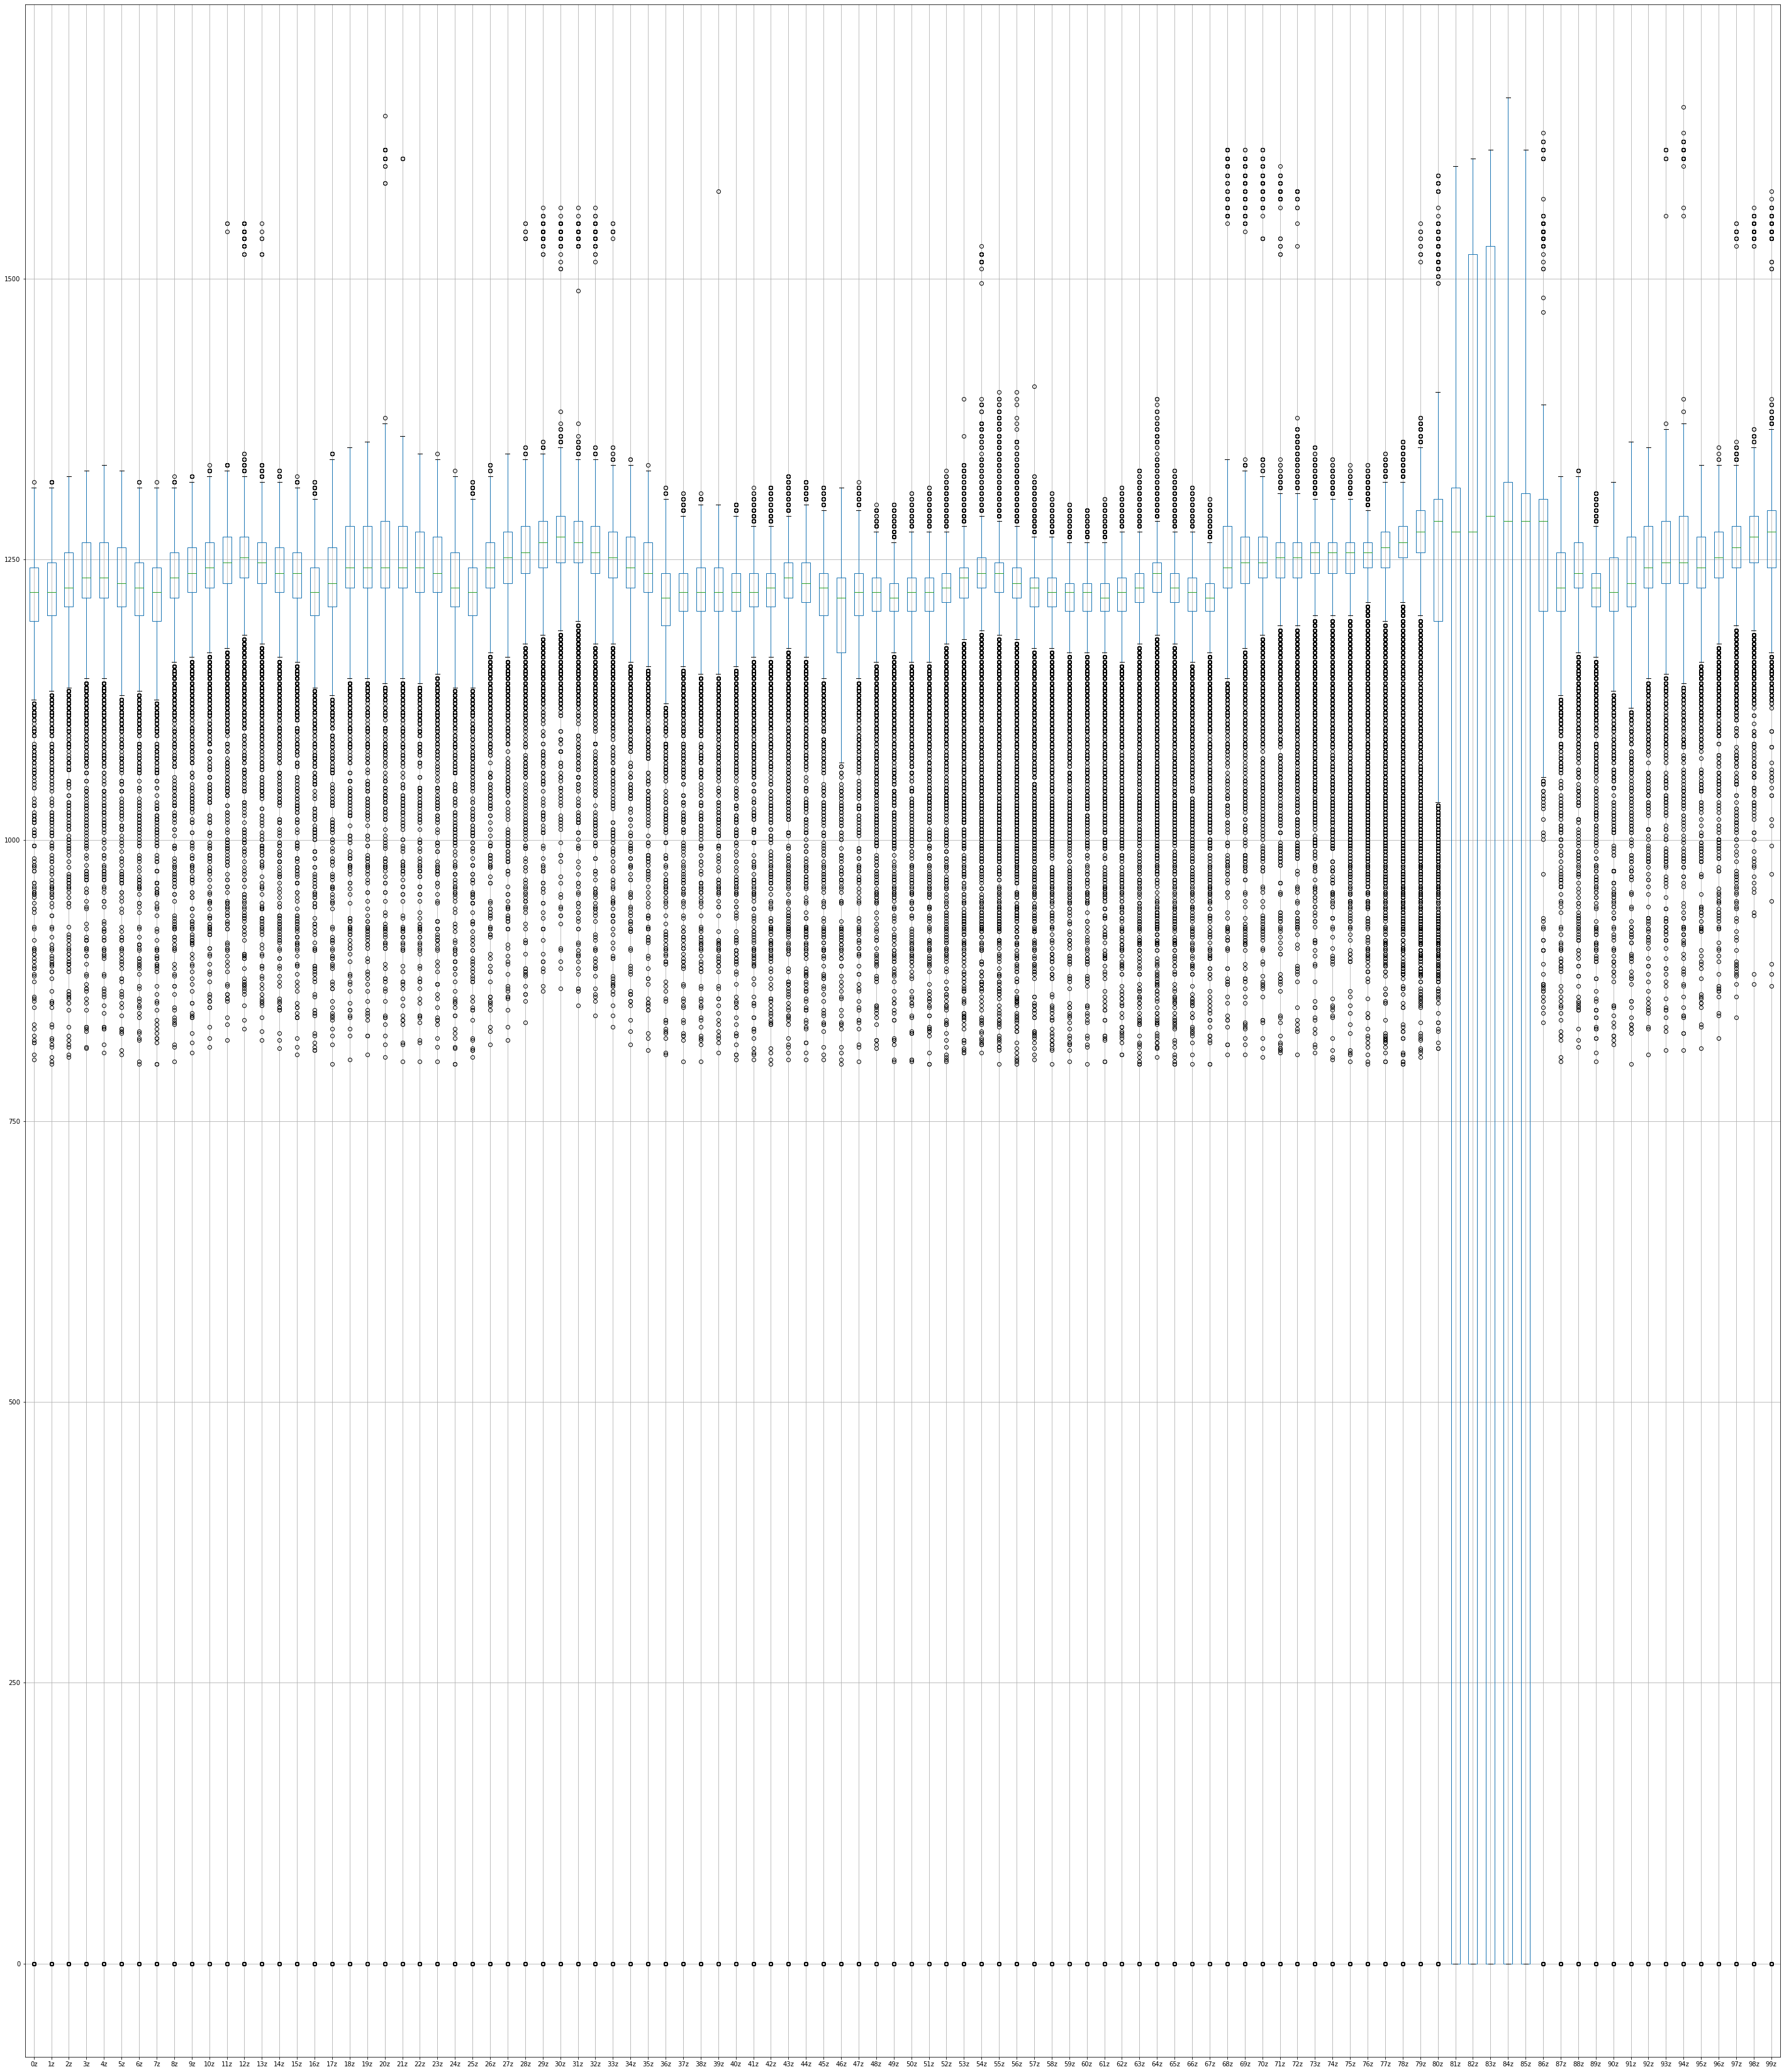

In [17]:
df.iloc[:,3::3].boxplot(figsize=(50,60))

<AxesSubplot:>

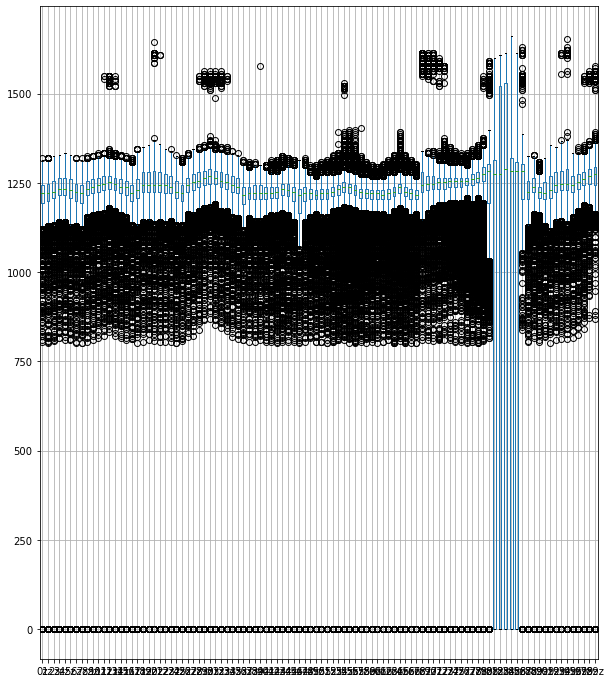

In [18]:
df.iloc[:,3::3].boxplot(figsize=(10,12))

# -------------------------- INITIAL TEST CODE AHEAD ------------------- 

In [19]:
# Analyzing content for one file
# Reading the source file
df = pd.read_csv('a_affirmative_datapoints.txt',sep=' ')
# Reading the target file
df_t= pd.read_csv('a_affirmative_targets.txt',sep=' ')

In [20]:
df_t['0'].value_counts()

0    647
1    414
Name: 0, dtype: int64

In [21]:
count_nan = df.isnull().sum().sum()
count_nan

0

In [22]:
df.describe()

,0.0,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
count,1.062000e+03,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,...,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,1.390385e+09,292.659406,206.399298,1194.510358,289.918854,204.382603,1194.132768,286.384347,203.694643,1200.354049,...,1230.807910,322.586874,191.544608,1242.333333,328.252974,194.715500,1169.558380,331.170114,198.280515,648.445386
std,1.992671e+01,3.269690,5.064240,25.282781,3.290498,5.039848,25.963911,3.283946,5.032369,25.655274,...,24.915102,3.771937,4.921710,24.508284,3.785287,4.653358,318.198978,3.724778,4.504665,635.744931
min,1.390385e+09,244.672000,177.921000,820.000000,240.949000,175.094000,824.000000,235.994000,173.782000,826.000000,...,866.000000,283.559000,163.160000,883.000000,291.722000,166.845000,0.000000,296.547000,170.912000,0.000000
25%,1.390385e+09,291.232750,204.217500,1187.000000,288.509500,202.229250,1187.000000,285.089500,201.568500,1195.000000,...,1225.000000,320.612500,189.647500,1234.000000,326.207250,193.027000,1247.000000,329.030750,196.521750,0.000000
50%,1.390385e+09,292.604000,205.921500,1200.000000,289.883000,203.918500,1200.000000,286.385000,203.367500,1204.000000,...,1234.000000,322.541500,190.840500,1247.000000,328.241500,194.010500,1256.000000,331.153000,197.701500,1240.500000
75%,1.390386e+09,293.733750,209.568250,1204.000000,290.973500,207.461750,1204.000000,287.413750,206.754250,1208.000000,...,1243.000000,324.143250,193.974250,1252.000000,329.824750,196.798500,1265.000000,332.720500,200.284000,1265.000000
max,1.390386e+09,308.682000,220.515000,1238.000000,305.234000,218.455000,1238.000000,301.714000,217.663000,1238.000000,...,1265.000000,349.915000,206.785000,1284.000000,356.850000,208.567000,1309.000000,360.695000,211.350000,1376.000000


In [23]:
df

,0.0,0x,0y,0z,1x,1y,1z,2x,2y,2z,...,96z,97x,97y,97z,98x,98y,98z,99x,99y,99z
0,1.390385e+09,244.672,208.182,895,240.949,205.708,890,235.994,205.018,883,...,923,283.559,186.549,944,291.722,189.204,0,296.547,192.722,1019
1,1.390385e+09,265.953,195.731,1016,262.556,193.301,1007,258.243,192.547,1001,...,1050,301.606,176.421,1069,308.776,180.199,0,312.501,184.498,0
2,1.390385e+09,272.755,192.786,1060,269.481,190.460,1056,265.371,189.756,1053,...,1097,307.299,174.126,1114,314.125,177.992,1140,317.529,182.324,1179
3,1.390385e+09,281.890,190.533,1129,278.861,188.023,1129,274.899,187.213,1136,...,1167,315.525,176.009,1187,322.016,180.029,0,325.041,184.442,1252
4,1.390385e+09,283.933,193.201,1159,280.955,190.877,1159,277.180,190.196,1167,...,1195,315.102,177.654,1216,321.384,181.259,1225,324.488,185.400,1284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1.390386e+09,305.002,178.982,1031,301.909,176.615,1031,297.876,175.637,1034,...,1073,340.726,164.547,1093,346.685,169.190,1111,349.354,173.836,0
1058,1.390386e+09,307.250,177.933,981,304.047,175.286,984,299.787,174.117,990,...,1025,345.180,163.872,1050,351.357,168.956,0,354.005,173.983,0
1059,1.390386e+09,308.187,177.921,954,304.900,175.096,959,300.489,173.817,962,...,1001,347.205,163.965,1025,353.583,169.346,0,356.297,174.639,0
1060,1.390386e+09,308.682,178.098,902,305.234,175.094,904,300.564,173.782,911,...,952,349.915,163.160,968,356.592,168.719,0,359.354,174.325,0


In [28]:
df_t['0'].value_counts()

0    647
1    414
Name: 0, dtype: int64

In [29]:
#Case 1:
#Covariance Matrix
#Dropping without z

In [30]:
t = df.iloc[-4,:][1:]

In [31]:
t= list(t)

In [32]:
lx,ly,lz=[],[],[]
for i in range(0,len(t),3):
    lx.append(t[i])
    ly.append(t[i+1])
    lz.append(t[i+2])

In [33]:
len(lx)

100

In [34]:
tdf= pd.DataFrame({'x':lx,'y':ly,'z':lz})

<AxesSubplot:>

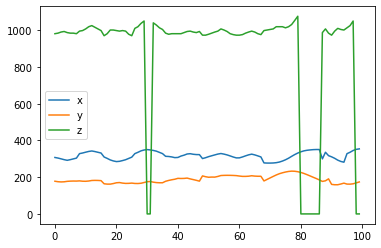

In [35]:
tdf.plot()

In [36]:
import plotly.express as px
fig = px.scatter_3d(tdf, x='x', y='y', z='z')
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [37]:
tdf.mode()

,x,y,z
0,276.731,158.810,0.0
1,276.765,158.852,NaN
2,277.276,160.696,NaN
3,277.639,162.053,NaN
4,278.938,162.168,NaN
...,...,...,...
95,350.165,227.980,NaN
96,350.522,229.752,NaN
97,350.528,231.168,NaN
98,351.357,232.200,NaN
